# 設定

In [1]:
from binance import Client
pairs = ['BTCUSDT'] #交易對
freq = '15m' # 資料頻率

# 建立客戶端
api_key = 'q83082FKrJBQmMxUrpVrEcaPhummrxW7L72rzgEU18uuGCCeDlkjajQ2CMSaob3a'
api_secret = 'XSVPcjjDh5WUZgCx5RZ7DOHWlBp3NxZUnxXmFkZ37hkAnxc5RqR59xzJ0YSXE0Fq'
client = Client(api_key=api_key,api_secret=api_secret)

# 跑回測取得n1n2

  0%|          | 0/741 [00:00<?, ?it/s]

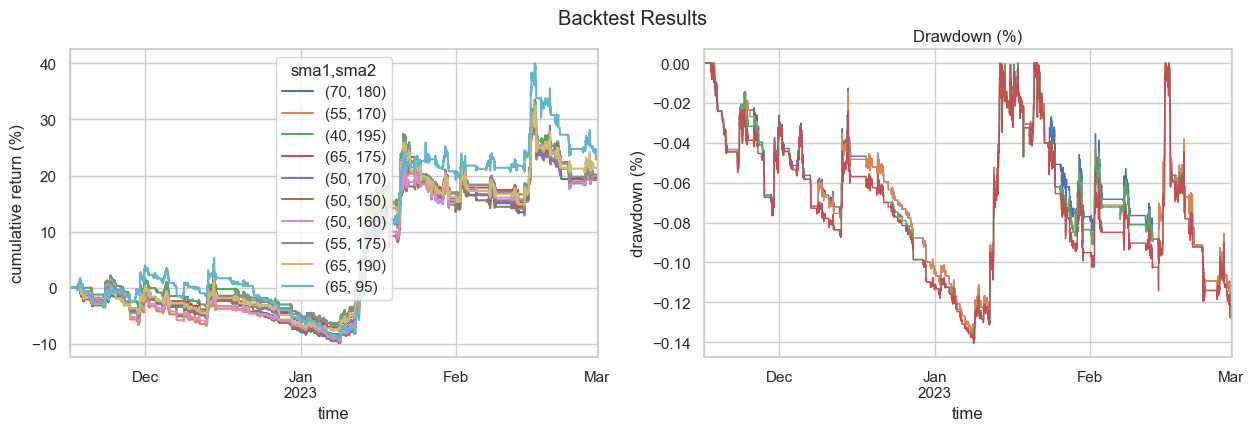

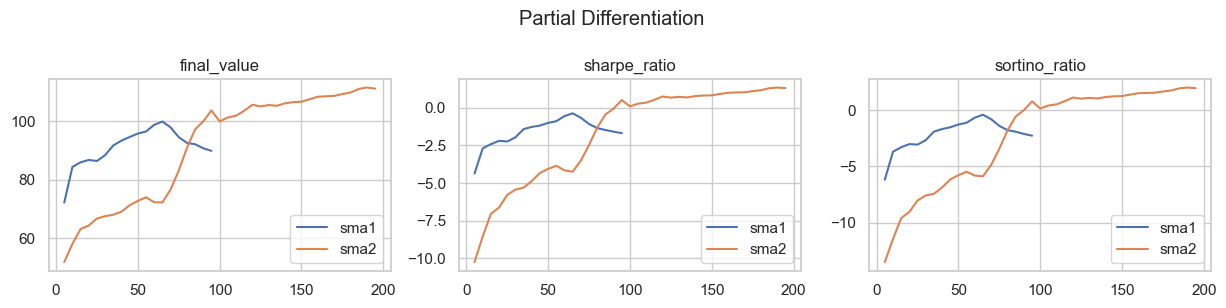

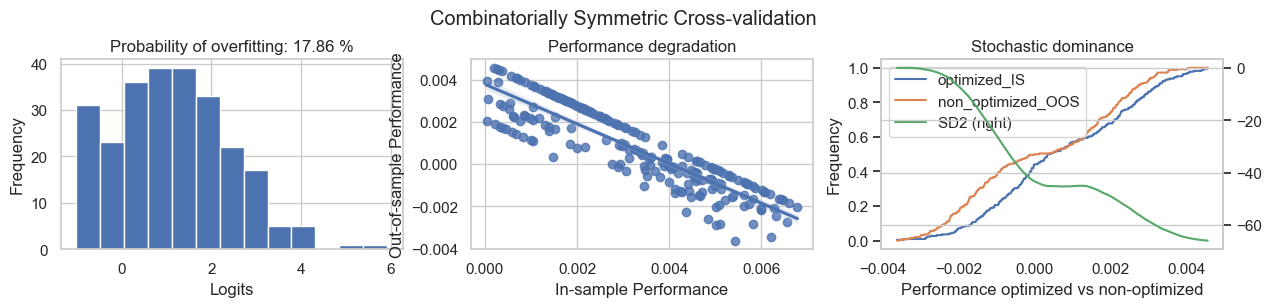

Output()

In [2]:
import numpy as np
import finlab_crypto
from finlab_crypto import Strategy


n1n2 = {}
for i in pairs:
  n1n2[i] = []

def Optimization(pair,freq):
  # 歷史價格數據
  ohlcv = finlab_crypto.crawler.get_nbars_binance(pair,freq,10000,client)

  #定義策略
  @Strategy(sma1=20, sma2=60)
  def sma_strategy(ohlcv):
    # 定義均線策略進出場條件
    close = ohlcv.close
    sma1 = close.rolling(sma_strategy.sma1).mean()
    sma2 = close.rolling(sma_strategy.sma2).mean()
    entries = (sma1 > sma2) & (sma1.shift() < sma2.shift())
    exits = (sma1 < sma2) & (sma1.shift() > sma2.shift())
    figures = {'overlaps': {'sma1': sma1,'sma1': sma2}}
    return entries, exits, figures

  # 策略超參數
  variables = {
      'sma1': np.arange(5, 100, 5), 
      'sma2': np.arange(5, 200, 5),
      }

  #回測及優化
  portfolio = sma_strategy.backtest(ohlcv, variables=variables, freq=freq ,plot=True)
  temp = portfolio.total_profit()[portfolio.total_profit()==portfolio.total_profit().max()].to_frame().reset_index()
  n1n2[pair] = [temp['sma1'].values[0],temp['sma2'].values[0]]

for pair in pairs:
  portfolio = Optimization(pair,freq)

In [3]:
n1n2

{'BTCUSDT': [65, 95]}